# [Homework] Gaussian Mixture Model (GMM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from numpy.linalg import norm
import random

### Implement yourself the GMM algorithm for Example 1 (density estimation for a Gaussian mixture) given in the Lab 3 document.

In [2]:
n = 2                     # number of clusters
n_samples = 300           # number of samples
np.random.seed(132323540) # generate random sample, two components
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20]) # generate spherical data centered on (20, 20)
C = np.array([[0., -0.7], [3.5, .7]]) # generate zero centered stretched Gaussian data
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([shifted_gaussian, stretched_gaussian]) # concatenate the two datasets into the final training set

In [15]:
X_train.shape

(600, 2)

Text(0,0.5,'x1')

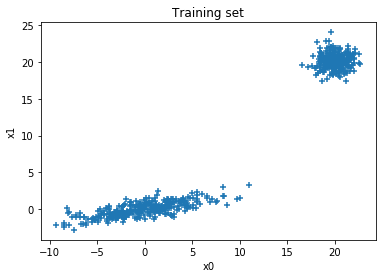

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], marker='+')
plt.title('Training set')
plt.xlabel('x0')
plt.ylabel('x1')

### GMM algorithm (Expectation - Maximization)

##### 1. Expectation step

In [5]:
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    for i in range(n_clusters):
        clusters.append({
            'phi_k': 1.0 / n_clusters,
            'mu_k': 0.0,
            'sigma_k': np.identity(X.shape[1], dtype=np.float64)
        })
    return clusters

In [6]:
clusters = initialize_clusters(X_train,2)
print(clusters)

[{'phi_k': 0.5, 'mu_k': 0.0, 'sigma_k': array([[1., 0.],
       [0., 1.]])}, {'phi_k': 0.5, 'mu_k': 0.0, 'sigma_k': array([[1., 0.],
       [0., 1.]])}]


In [7]:
def gaussian(X, mu, sigma): # Return the gaussian distribution density (pdf)
    n = X.shape[1]
    diff = X - mu
    a = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(sigma) ** 0.5)
    c = np.dot(diff, np.linalg.inv(sigma)) # (600,2)*(2,2)
    b = np.exp(-0.5 * np.dot(c, diff.T))   # (600,2)*(2,600)
    print("a = ",a)
    print("b = ",b.shape)
    print("c = ", c.shape)
    return a * b

In [8]:
# Compute w_nk as defined in the lecture (k -> the cluster, i -> training examples)
def expectation_step(X, clusters):
    total = np.zeros((X.shape[0], 1), dtype=np.float64)
    for cluster in clusters:                      # For each cluster passed in parameter
        phi_k = cluster['phi_k']                  #   Get its parameters
        mu_k = cluster['mu_k']
        sigma_k = cluster['sigma_k']
        
        w_ik = phi_k * gaussian(X, mu_k, sigma_k) #   Compute w_ik using the gaussian density function
        w_ik = np.diagonal(w_ik).reshape(-1,1)    #   on reshape pcq sinon ya des galères de dimensions après lol
        cluster['w_ik'] = w_ik                    #   Update w_ik in the cluster
        
        total += w_ik                             #   Compute the total of the sum of w_ik
        
    for cluster in clusters:                      # when all the w_ik are computed, divide each one of them by the total
        cluster['w_ik'] = cluster['w_ik'] / total #   divide it by the total sum of w_ik
    return clusters

In [9]:
clusters = expectation_step(X_train,clusters)

a =  0.15915494309189535
b =  (600, 600)
c =  (600, 2)
a =  0.15915494309189535
b =  (600, 600)
c =  (600, 2)


##### 2. Maximization step

In [10]:
def maximization_step(X, clusters): # Update the estimated parameters using MLE
    I = float(X.shape[0])
  
    for cluster in clusters:
        sigma_k = np.zeros((X.shape[1], X.shape[1]))  # Initialize the covariance matrix sigma
        
        w_ik = cluster['w_ik']                        # Get the soft weight w_ik of the current cluster
        sum_w_ik = np.sum(w_ik, axis=0)               # Sum all the soft weights
        phi_k = sum_w_ik / I                          # Compute phi
        mu_k = np.sum(w_ik * X, axis=0) / sum_w_ik    # Compute mu
        
        sigma_k = 0 # Non ?
        for i in range(X.shape[0]):
            diff = X[i] - mu_k
            sigma_k += w_ik[i] * np.dot(diff, diff.T) # Compute sigma
        sigma_k /= sum_w_ik                           # Divide the previously found sigma by the total of w_ik
        
        cluster['phi_k'] = phi_k                      # Update cluster parameters
        cluster['mu_k'] = mu_k
        cluster['sigma_k'] = sigma_k
    return clusters

In [11]:
clusters = maximization_step(X_train,clusters)

##### Log likelihood (?)

In [12]:
#Quelle metric utiliser dans le cas de GMM?

##### Train loop

In [13]:
def train(X,n_clusters,patience):
    clusters = initialize_clusters(X, n_clusters) #initialize the clusters
    clusters_evo = []
    while (stop != patience):     
        clusters = expectation_step(X, clusters)  # Compute the w_ik values
        clusters = maximization_step(X, clusters) # Optimize the parameters according to the previous w_ik value
        #compute the convergence criteria
        # ON UTILISE QUOI ?? LOG LIKELIHOOD?
        cluster_evo = np.append(cluster_evo,clusters)
    return clusters,clusters_evo

##### Plot the results

1. Convergence

In [ ]:
np

2. Visualize the clusters

In [14]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = #-clf.score_samples(XX) #Compute the weighted log probabilities for each sample. Log probabilities of each data point in X
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend=’both’)
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title(’Negative log-likelihood predicted by a GMM’)
plt.axis(’tight’)
plt.show()

SyntaxError: invalid syntax (<ipython-input-14-d79a614a6dc7>, line 6)

In [16]:
a = np.array([[20],[18.88]])

In [17]:
np.dot(a,a.T)

array([[400.    , 377.6   ],
       [377.6   , 356.4544]])

In [ ]:
a = 
b =
c = 